# Data Preparation

In [1]:
import sys
sys.path.append("..")

import module.utils.general_utils as general_utils
import module.utils.data_prepare_utils as data_prepare_utils
import module.utils.eda_utils as eda_utils
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd

In [2]:
start = time.time()

In [3]:
TARGET = "label"
TRAIN_FILE_PATH = "../data/train_df.csv"

## 1. Create a copy of train_df for data preparation

In [4]:
train_df = general_utils.read_csv(TRAIN_FILE_PATH)


Read CSV file ../data/train_df.csv into DataFrame:
df.head(): 


,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,...,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d,label
0,1920544,3854,3367,7,207,17,5,11,13,37,...,4,20,-1,-1,2,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,17,6,0
1,1850503,3903,6370,7,173,52,5,12,69,11,...,2,-1,-1,-1,2,5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^...,12,50,7,0
2,2157496,1847,6428,6,178,17,5,18,70,39,...,7,20,1,-1,9,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,36,7,0
3,2072043,4125,4468,7,168,37,5,12,44,40,...,2,20,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,11,17,6,0
4,1084626,4811,3326,7,183,29,5,12,86,37,...,3,18,-1,-1,2,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,17,6,0


df.shape: (670513, 36)


In [5]:
train_df_prep = train_df.copy()
del train_df

In [6]:
numerical_attr_list = []
numerical_attr_list

[]

In [7]:
categorical_attr_list = [attr for attr in train_df_prep.columns if attr not in numerical_attr_list and attr != TARGET]
categorical_attr_list

['uid',
 'task_id',
 'adv_id',
 'creat_type_cd',
 'adv_prim_id',
 'dev_id',
 'inter_type_cd',
 'slot_id',
 'spread_app_id',
 'tags',
 'app_first_class',
 'app_second_class',
 'age',
 'city',
 'city_rank',
 'device_name',
 'device_size',
 'career',
 'gender',
 'net_type',
 'residence',
 'his_app_size',
 'his_on_shelf_time',
 'app_score',
 'emui_dev',
 'list_time',
 'device_price',
 'up_life_duration',
 'up_membership_grade',
 'membership_life_duration',
 'consume_purchase',
 'communication_onlinerate',
 'communication_avgonline_30d',
 'indu_name',
 'pt_d']

## 2. Identify required transformation

In this section, we check if any data transformation is needed based on the exploratory data analysis.
 

**2.1 Drop attributes - included**<br>

In [8]:
# Check eda.ipynb for detailed analysis for choosing attrs to drop
attrs_to_drop = ['uid', 'app_score', 'his_on_shelf_time', 'task_id', 'spread_app_id', 'tags', 'dev_id']
attrs_to_drop

['uid',
 'app_score',
 'his_on_shelf_time',
 'task_id',
 'spread_app_id',
 'tags',
 'dev_id']

**2.2 Feature scaling - included**<br>
standardize or normalize features: standardize.<br>
Standardization is useful when the algorithm assumes that the features are centered around zero, like in Ridge and Lasso regression. It can handle outliers better as it does not bound to a specific range. In contrast, normalization can be sensitive to outliers.

**2.3 Drop outliers - not included**<br>
Some of the data points are significantly different from the rest of dataset. However, considering them as outliers is not feasible.<br>
All attributes in this data set are pre-encoded and categorical, preventing us from understanding the context and investigating abnormal observations. Therefore, the process of dropping outliers is not included in this project.

**2.4 Fill/drop missingness - not included**<br>
No missing value is found in the data set. Therefore, this process is ignored.

**2.5 Discretize continuous features - not included**<br>
Data discretization is used to group continuous values into contiguous intevals. Many of the attributes in the original data set seem to be discretized already. 

**2.6 Decompose features - not included**<br>
No data set documentation is found when getting the data set and all attributes are pre-encoded. Therefore, decomposing these transformed features is unnecessary. 

**2.7 Transform features - not included**<br>
Based on the fact that all features are categorical, only target encoding is implement. Log transformation or square root transformation is unnecessary.

**2.8 Aggregate features into new features - not included**<br>
Because the original data set has be preprocessed already (probably for privacy consideration), the actual meanings of numerous values are unclear. It constrains our capacity to construct meaningful and useful features.<br>
For example, the feature **gender** has three groups of values - 2, 4, 3. We lack information to identify the actual gender.

## 3. Create a pipeline of transformer

In [9]:
train_df_prep = data_prepare_utils.drop_duplicate_obs(train_df_prep)


Drop duplicate observations:
df.shape:  (670513, 36)
drop_dup_df.shape:  (667734, 36)


In [10]:
numerical_transformer = Pipeline([
    ("column_dropper", data_prepare_utils.DropColumnsTransformer(attrs_to_drop)),
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler())
])
numerical_transformer

Pipeline(steps=[('column_dropper',
                 DropColumnsTransformer(attrs_to_drop=['uid', 'app_score',
                                                       'his_on_shelf_time',
                                                       'task_id',
                                                       'spread_app_id', 'tags',
                                                       'dev_id'])),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [11]:
categorical_transformer = Pipeline([
    ("column_dropper", data_prepare_utils.DropColumnsTransformer(attrs_to_drop)),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("target_encoder", TargetEncoder(random_state=42)),
    ("scaler", StandardScaler())
])
categorical_transformer

Pipeline(steps=[('column_dropper',
                 DropColumnsTransformer(attrs_to_drop=['uid', 'app_score',
                                                       'his_on_shelf_time',
                                                       'task_id',
                                                       'spread_app_id', 'tags',
                                                       'dev_id'])),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('target_encoder', TargetEncoder(random_state=42)),
                ('scaler', StandardScaler())])

In [12]:
preprocessor = ColumnTransformer([
    ("numerical", numerical_transformer, numerical_attr_list),
    ("categorical", categorical_transformer, categorical_attr_list)
])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('column_dropper',
                                                  DropColumnsTransformer(attrs_to_drop=['uid',
                                                                                        'app_score',
                                                                                        'his_on_shelf_time',
                                                                                        'task_id',
                                                                                        'spread_app_id',
                                                                                        'tags',
                                                                                        'dev_id'])),
                                                 ('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 []),
                                ('categorical',
                                 Pipeline(steps=[('column_dropper',
                                                  DropColumnsTransformer(attrs_to_drop=['...
                                  'adv_prim_id', 'dev_id', 'inter_type_cd',
                                  'slot_id', 'spread_app_id', 'tags',
                                  'app_first_class', 'app_second_class', 'age',
                                  'city', 'city_rank', 'device_name',
                                  'device_size', 'career', 'gender', 'net_type',
                                  'residence', 'his_app_size',
                                  'his_on_shelf_time', 'app_score', 'emui_dev',
                                  'list_time', 'device_price',
                                  'up_life_duration', 'up_membership_grade',
                                  'membership_life_duration', ...])])

In [13]:
cap_x, y = train_df_prep.drop(columns=TARGET), train_df_prep[TARGET]
cap_x_transformed = preprocessor.fit_transform(cap_x, y)

## 4. EDA on transformed dataset

In [14]:
transformed_df = pd.DataFrame(cap_x_transformed, columns=[column for column in cap_x.columns if column not in attrs_to_drop])
transformed_df[TARGET] = y.reset_index(drop=True)
del cap_x, y

In [15]:
eda_utils.check_out_general_info(transformed_df)


General information of DataFrame:
df.shape:
(667734, 29)
df.head():


,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,app_first_class,app_second_class,age,city,city_rank,...,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d,label
0,1.219928,0.498589,0.973907,0.182711,-0.743051,0.533118,0.926133,-0.224781,0.159661,-0.384008,...,-0.706049,-1.031244,0.376594,0.024764,0.327098,-0.464220,0.125695,0.671355,-0.080020,0
1,-0.402045,0.498589,-0.914180,0.182711,1.821292,0.533118,-1.973414,-0.224781,-1.075835,-0.384008,...,0.925088,1.065926,0.376594,0.024764,0.327098,0.234600,0.010452,-1.253749,0.708831,0
2,1.929817,-1.528125,0.760584,0.182711,-0.089925,0.533118,0.485109,-0.480146,-0.102050,0.662081,...,4.268159,-1.031244,-2.738094,0.024764,-3.695259,-0.285693,-0.575845,0.672856,0.708831,0
3,0.713605,0.488431,-0.338310,0.191283,1.816624,0.535768,0.517517,-0.689466,1.056867,0.643756,...,0.957161,-0.985140,0.357293,0.020211,0.330090,-0.029142,-0.176604,0.675698,0.368311,0
4,-1.215356,0.498589,1.861725,0.182711,1.821292,0.533118,0.926133,-0.686455,0.956041,0.662081,...,0.232120,-0.218316,0.376594,0.024764,0.327098,-0.464220,0.125695,0.671355,-0.080020,0


df.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667734 entries, 0 to 667733
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   adv_id                       667734 non-null  float64
 1   creat_type_cd                667734 non-null  float64
 2   adv_prim_id                  667734 non-null  float64
 3   inter_type_cd                667734 non-null  float64
 4   slot_id                      667734 non-null  float64
 5   app_first_class              667734 non-null  float64
 6   app_second_class             667734 non-null  float64
 7   age                          667734 non-null  float64
 8   city                         667734 non-null  float64
 9   city_rank                    667734 non-null  float64
 10  device_name                  667734 non-null  float64
 11  device_size                  667734 non-null  float64
 12  career                       667734 non-null  flo

None

df.describe: 


,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,app_first_class,app_second_class,age,city,city_rank,...,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d,label
count,6.677340e+05,6.677340e+05,6.677340e+05,6.677340e+05,6.677340e+05,6.677340e+05,6.677340e+05,6.677340e+05,6.677340e+05,6.677340e+05,...,6.677340e+05,6.677340e+05,6.677340e+05,6.677340e+05,6.677340e+05,6.677340e+05,6.677340e+05,6.677340e+05,6.677340e+05,667734.000000
mean,3.113242e-13,-4.006527e-11,1.166022e-12,-7.040998e-13,4.999473e-12,-1.408339e-11,3.950747e-12,3.698450e-12,1.354399e-12,-4.661512e-12,...,2.726179e-12,-6.749452e-12,6.353940e-12,7.682654e-12,6.127771e-11,-4.151015e-12,1.358318e-11,-2.154532e-12,2.495071e-11,0.034527
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.182579
min,-1.215356e+00,-3.510487e+00,-2.210493e+00,-2.516861e+00,-1.165425e+00,-1.897929e+00,-3.609984e+00,-6.901144e-01,-4.573845e+00,-8.880515e-01,...,-7.302341e-01,-2.578404e+00,-7.437515e+00,-7.587568e+01,-1.115260e+01,-4.223783e+00,-6.068367e-01,-3.042328e+00,-1.236440e+00,0.000000
25%,-6.703310e-01,4.742757e-01,-6.801577e-01,1.785024e-01,-6.844345e-01,5.237720e-01,-9.647682e-01,-6.661750e-01,-6.480737e-01,-8.566875e-01,...,-7.060486e-01,-9.577776e-01,3.527537e-01,1.908515e-02,2.963581e-01,-2.856925e-01,-2.045882e-01,-9.246459e-01,-8.559814e-01,0.000000
50%,-2.893778e-01,4.802302e-01,-1.769231e-01,1.795274e-01,-2.334981e-01,5.308234e-01,4.945105e-01,-2.469965e-01,-2.151619e-01,-2.063119e-01,...,-5.041493e-01,-2.709349e-01,3.732027e-01,2.021067e-02,3.262504e-01,-7.514124e-02,4.590276e-03,6.552934e-01,-2.095073e-01,0.000000
75%,4.177357e-01,4.985887e-01,7.257454e-01,1.912833e-01,-2.548918e-02,5.353284e-01,8.971603e-01,-1.988624e-01,4.193462e-01,6.437557e-01,...,2.321199e-01,9.970070e-01,3.765942e-01,2.476408e-02,3.270983e-01,3.839505e-02,5.884553e-02,6.728557e-01,6.332809e-01,0.000000
max,3.411657e+01,1.030221e+00,3.688797e+00,1.606569e+00,1.838525e+00,5.357677e-01,9.261327e-01,9.182018e+00,1.491092e+01,8.220081e+00,...,1.149298e+01,7.595838e+00,2.690781e+00,3.001570e-02,2.888811e+00,1.184934e+02,1.617437e+01,2.276371e+00,2.025931e+00,1.000000


In [16]:
eda_utils.check_out_duplicate_obs(transformed_df)


Check out duplicate observations:
df.shape:  (667734, 29)
drop_dup_df.shape:  (667711, 29)
Caution: data set contains duplicate observations!!!



- There emerges a few new duplicate observations. This can be possible for the large dataset but with similar value range.
- After encoding, they can be encoded to the same value. We will not drop these few observations.


In [17]:
eda_utils.check_out_missing_target(transformed_df, TARGET)


Check out observations with missing target:
df.shape:  (667734, 29)
drop_miss_tar_df.shape:  (667734, 29)
No missing-target observations observed in data set.


In [18]:
eda_utils.check_out_missingness(transformed_df)


Check out missingness:
No missing values in data set.


In [19]:
numerical_attr_list = [attr for attr in transformed_df.columns if attr != TARGET]


Histogram plots for numerical attributes:


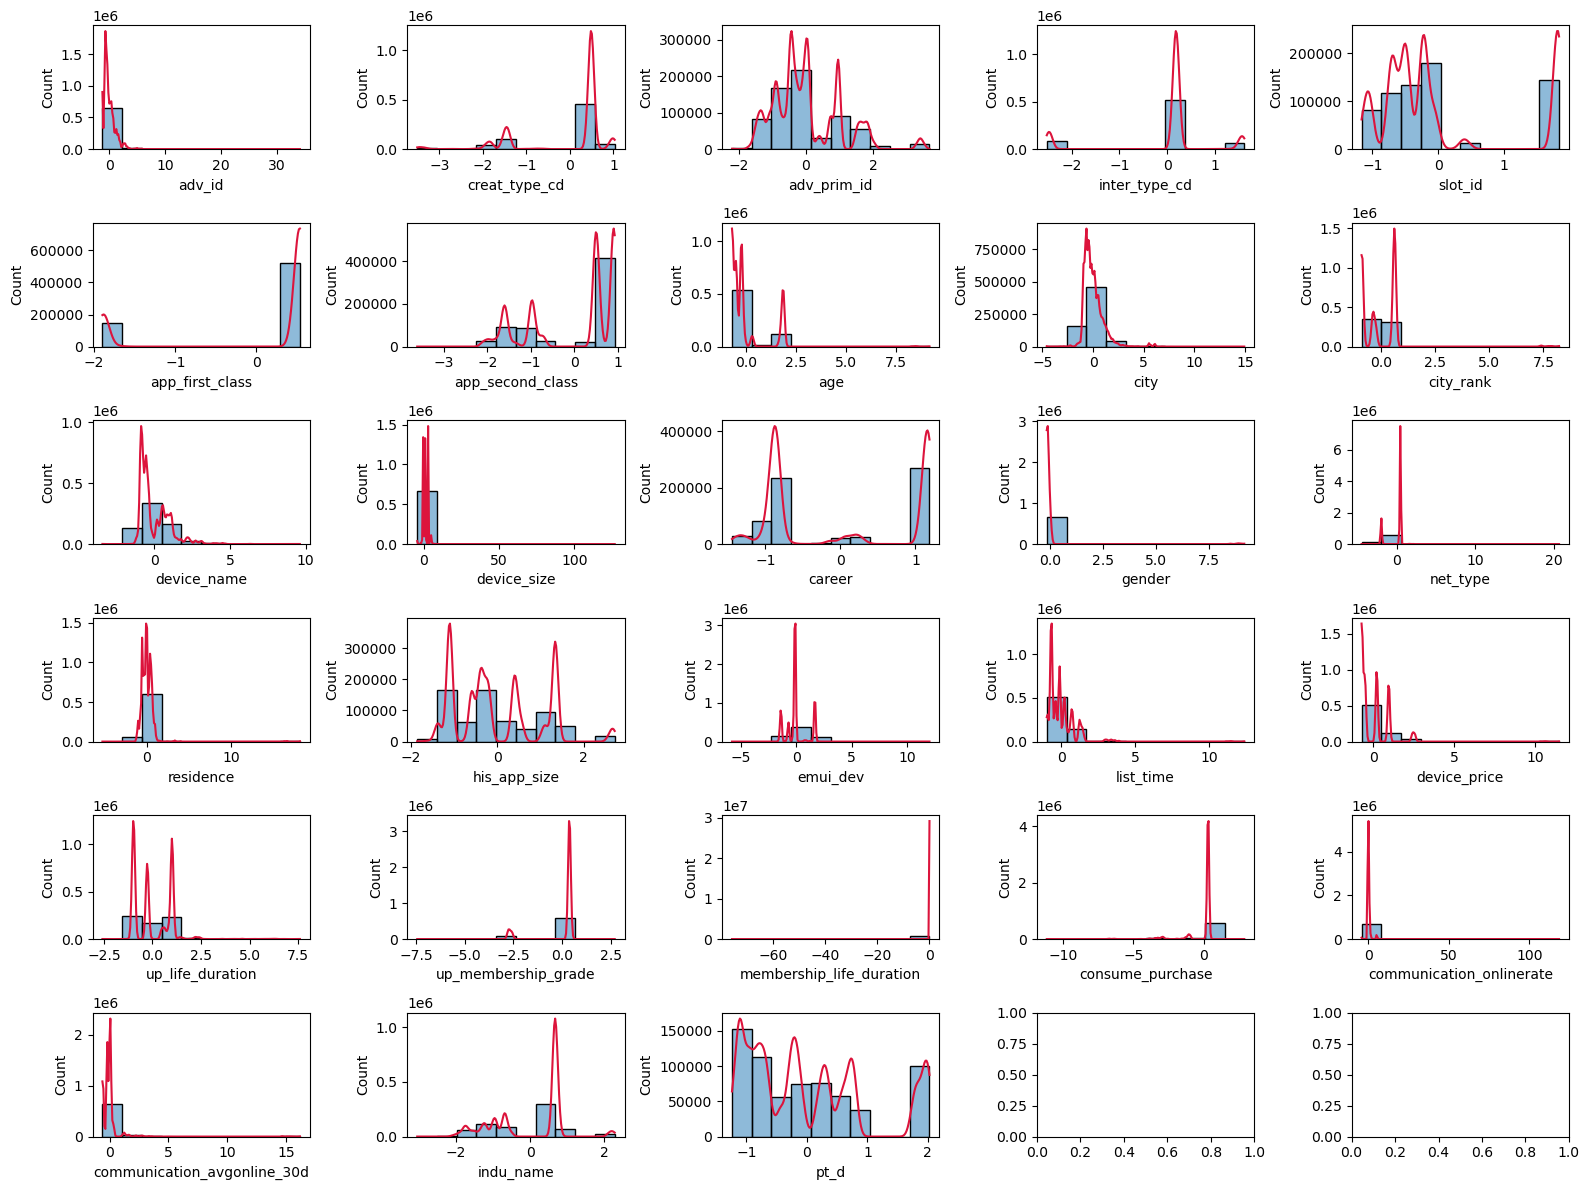

In [20]:
eda_utils.hist_plot_for_numerical(transformed_df, numerical_attr_list)

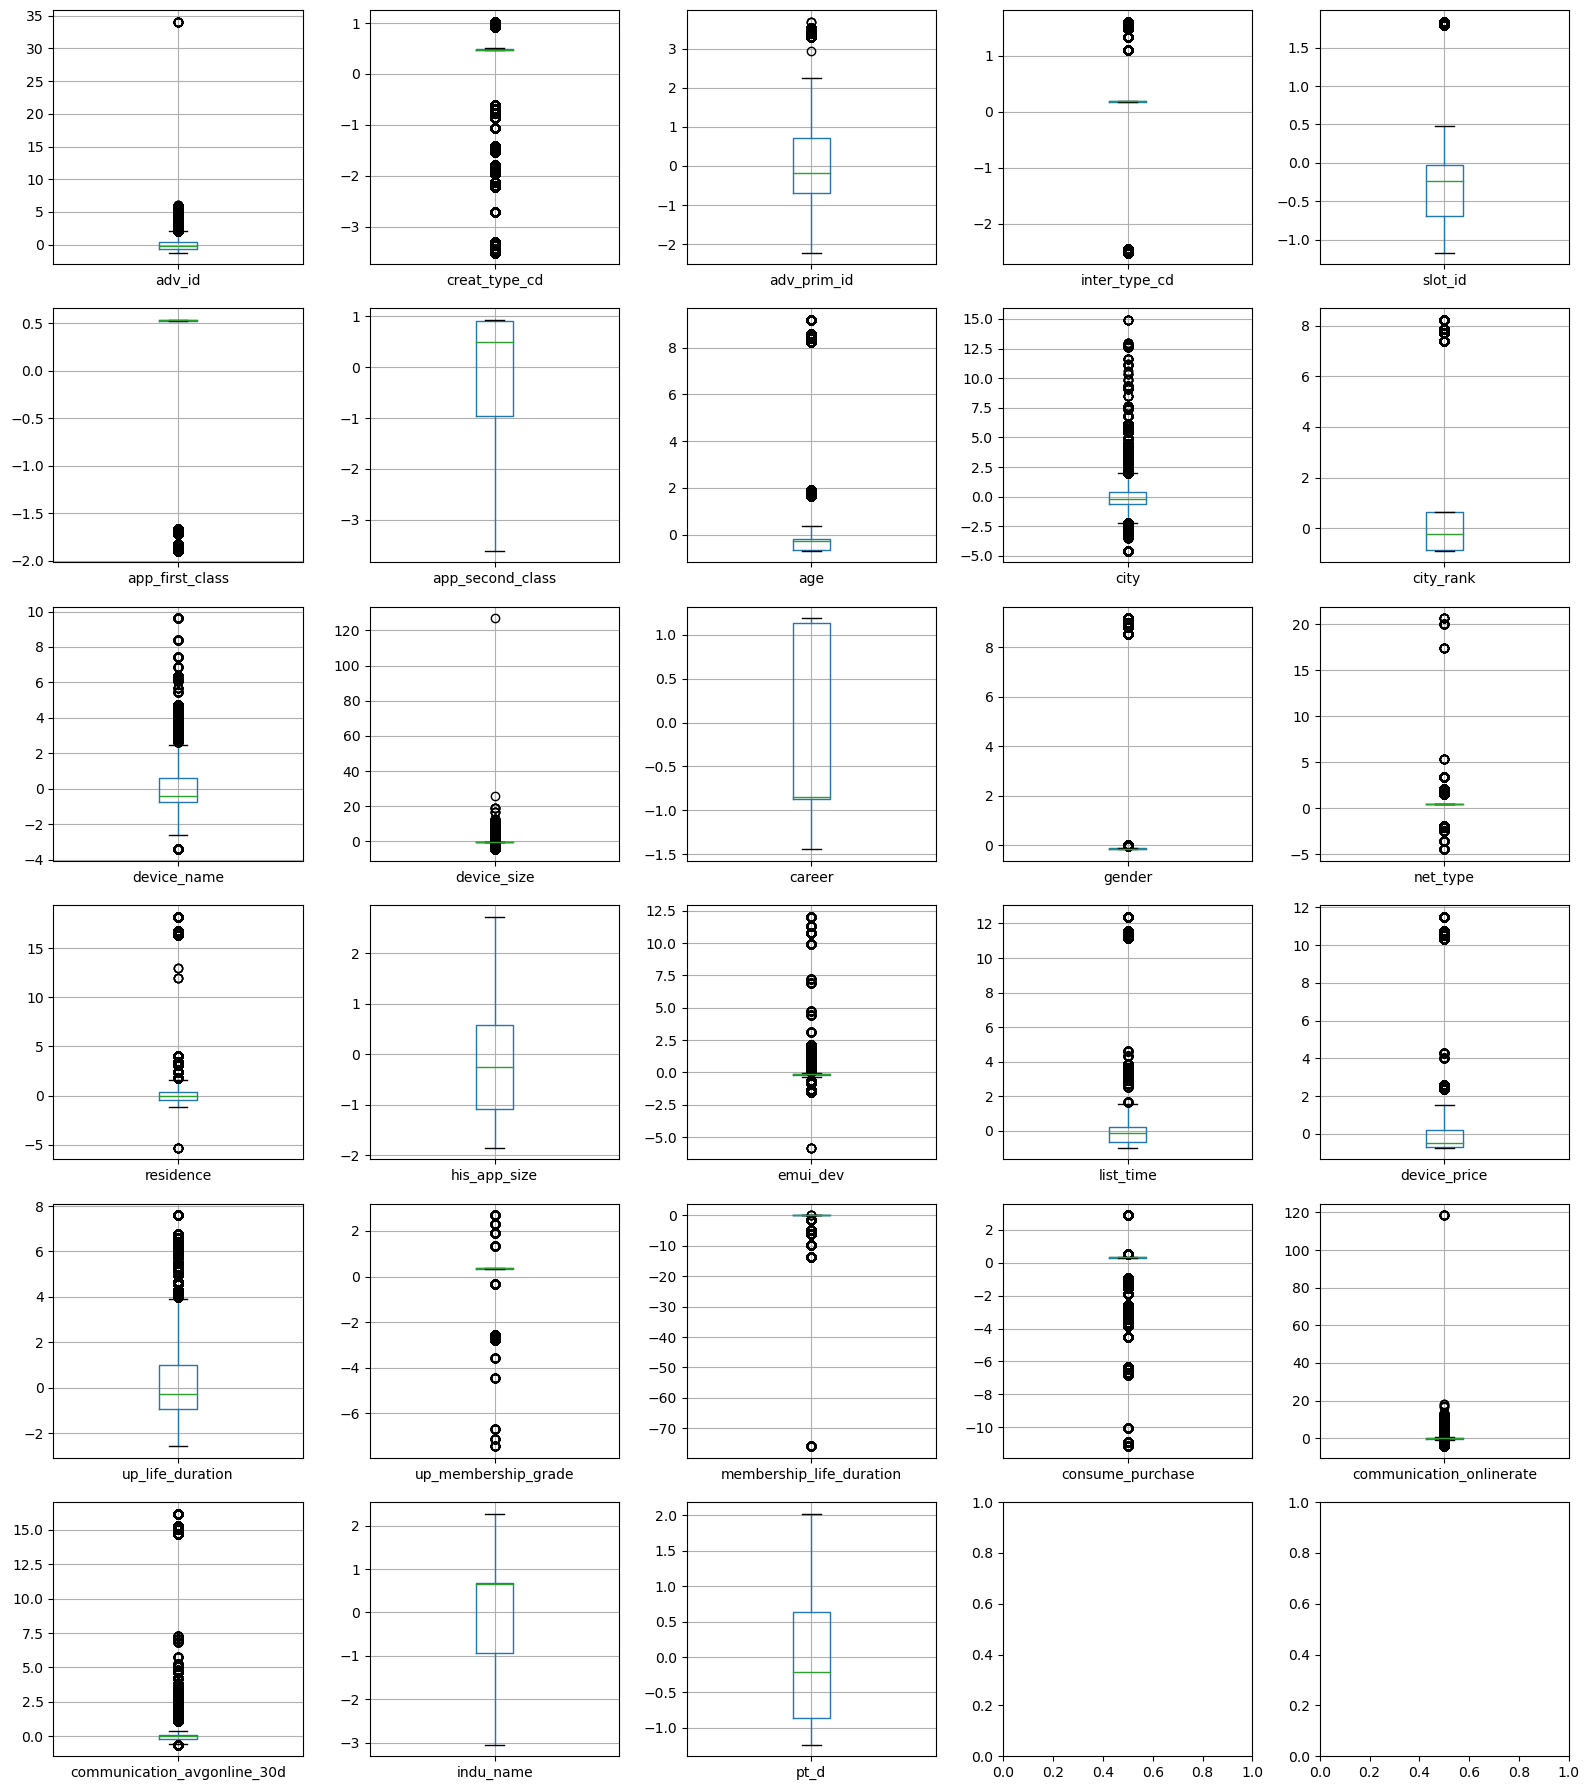

In [21]:
eda_utils.box_plot_for_numerical(transformed_df, numerical_attr_list)

In [22]:
eda_utils.tukeys_method_for_numerical(transformed_df, numerical_attr_list)


Implement Tukey's fences to identify outliers based on the Inter Quartile Range (IQR) method:


,Attribute,Outliers Prob Count,Outliers Prob Fraction,Outliers Poss Count,Outliers Poss Fraction
17,emui_dev,290170,0.434559,291345,0.436319
11,device_size,220484,0.330197,263468,0.394570
1,creat_type_cd,208361,0.312042,208361,0.312042
5,app_first_class,147216,0.220471,147216,0.220471
3,inter_type_cd,147187,0.220428,147187,0.220428
14,net_type,136325,0.204161,136325,0.204161
7,age,120460,0.180401,120460,0.180401
23,consume_purchase,82810,0.124016,82810,0.124016
21,up_membership_grade,81283,0.121730,81283,0.121730
25,communication_avgonline_30d,31299,0.046873,57004,0.085369



Heatmap visualizing correlation between numerical attributes:


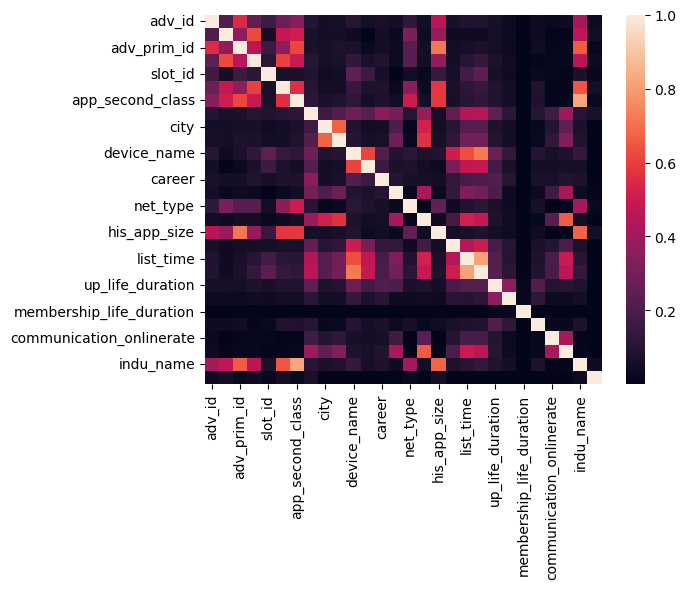


Matrix visualizing correlation (>0.5) between numerical attributes:


,correlation
app_second_class with indu_name,0.820756
list_time with device_price,0.809513
device_name with device_price,0.719863
adv_prim_id with his_app_size,0.718262
his_app_size with indu_name,0.674183
city with city_rank,0.671285
residence with communication_avgonline_30d,0.658800
adv_prim_id with indu_name,0.656442
app_first_class with indu_name,0.648029
device_name with list_time,0.631617


In [23]:
eda_utils.corr_for_numerical(transformed_df, numerical_attr_list)

In [24]:
eda_utils.print_vifs(transformed_df, numerical_attr_list)


Investigate multi co-linearity: calculate variance inflation factors (VIF):
Prepare DataFrame for vif calculation:
Added a bias term to the data frame to construct the design matrix for assessment of vifs.


,attribute,vif
20,device_price,4.750742
27,indu_name,4.394128
7,app_second_class,3.777068
11,device_name,3.603667
19,list_time,3.593817
3,adv_prim_id,3.481196
16,residence,3.251468
17,his_app_size,3.049231
6,app_first_class,2.883161
4,inter_type_cd,2.434871


In [25]:
end = time.time()
print(f'Script run time: {(end - start)/60} minutes')

Script run time: 1.0863603512446085 minutes
